In [ ]:
Notebook to get and clean the data of El Diario newspaper about covid19 vaccination

In [19]:
from helpers import *

In [19]:
def get_links_el_diario(url): 
    list_links_el_diario=[]
    driver.get(url)
    # Press the button while there are some, because they are added, see below,
     #once we have them all loaded, we put them in the list, because if we collect them every time we press the button
     #see below there would be many duplicates.
    while True: 
    #     time.sleep(1)
        try: 
            next = driver.find_element_by_xpath('/html/body/div[3]/div/div[2]/div[1]/button')
            next.click()
        except :

            print("No more pages left")
            break
    links = driver.find_elements_by_xpath('//h2/a')
    for i in links: 
        list_links_el_diario.append(i.get_attribute('href'))
    return list_links_el_diario

In [13]:
def get_html_el_diario(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/EL_DIARIO/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')

In [20]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.strip()
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub(' +', ' ',text)
#     text = re.sub('\w*\d\w*', '', text)
    return text

## EL DIARIO

In [14]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


In [15]:
search_url='https://www.eldiario.es/temas/vacunas/'

driver.get(search_url)

time.sleep(1)
# Aceptar cookkies
driver.find_element_by_xpath('/html/body/div[1]/div/div/div/div/div[2]/button[2]').click()

In [26]:
list_links_el_diario = get_links_el_diario(search_url)

No more pages left


In [27]:
# Store the list in a document
with open("list_links_el_diario.txt", 'w') as f:
    for s in list_links_el_diario:
        f.write(str(s) + '\n')

In [28]:
with open("list_links_el_diario.txt", 'r') as f:
    list_links_el_diario = [line.rstrip('\n') for line in f]
len(list_links_el_diario)

1402

In [35]:
get_html_el_diario(list_links_el_diario)

In [3]:
import os
list_articles_vacunacion_diario=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/EL_DIARIO/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/EL_DIARIO/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1", class_="title").text.strip()
    except: 
        title="error"
    try:
        author=soup.find("div", class_="info-wrapper").find("p",class_="authors").text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline = soup.find("h2").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find(class_="day").text.strip()
    except: 
        date="error"
    try:
        if soup.find("aside",class_='news-outlook'):
            aside_info=soup.find("aside",class_='news-outlook').decompose()
        tf = soup.find("div",class_="partner-wrapper article-page__body-row").find("div",class_="second-col").find_all("p", class_="article-text")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text)
    except: 
        text= "error"
    list_articles_vacunacion_diario.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [21]:
articles_el_diario = pd.DataFrame.from_dict(list_articles_vacunacion_diario)

In [22]:
articles_el_diario

,Title,Subheadline,Text,Authors,Date,Link
0,La farmacéutica Pfizer asegura que su vacuna c...,Los primeros resultados provisionales en ensay...,La vacuna contra la COVID-19 de la farmacéutic...,elDiario.es,9 de noviembre de 2020,https://www.eldiario.es/sociedad/farmaceutica-...
1,Los policías nacionales y guardias civiles des...,El delegado del Gobierno asegura que Sagardui ...,"El delegado del Gobierno en Euskadi, Denis Itx...",elDiario.es Euskadi\n ...,18 de febrero de 2021,https://www.eldiario.es/euskadi/policias-nacio...
2,Los contrastes de la pandemia: de la falta de ...,Catalunya vuelve a retrasar cirugías por colap...,"España es un país de contrastes, también en la...",Mónica Zas Marcos,27 de julio de 2021,https://www.eldiario.es/sociedad/pandemia-falt...
3,Los nuevos antivirales anticipan una etapa dif...,"Aunque prometedores, los tratamientos desarrol...","Durante la mayor parte de la pandemia, la mejo...",Esther Samper,21 de noviembre de 2021,https://www.eldiario.es/sociedad/nuevos-antivi...
4,Carmen Calvo afirma que no existe la posibilid...,error,La vicepresidenta primera del Gobierno y minis...,Europa Press,28 de mayo de 2021,https://www.eldiario.es/andalucia/carmen-calvo...
...,...,...,...,...,...,...
1397,CORONAVIRUS\n \n\n\n \n\n ...,El Ministerio de Sanidad ha notificado 39.638 ...,La tasa de incidencia a 14 días ha experimenta...,elDiario.es,9 de agosto de 2021,https://www.eldiario.es/sociedad/incidencia-ca...
1398,"El director del Serum Institute, el mayor fabr...",Poonawalla es el director ejecutivo de la empr...,"Adar Poonawalla, de 40 años, es el director ej...",Laura Spinney,16 de febrero de 2021,https://www.eldiario.es/internacional/theguard...
1399,Catalunya prevé comenzar la vacunación a la po...,La Generalitat advierte de que la Semana Santa...,A partir de abril y de forma progresiva. Este ...,elDiario.es / ACN,14 de marzo de 2021,https://www.eldiario.es/catalunya/catalunya-pr...
1400,"Un estudio sobre 1,3 millones de niños da carp...",Una revisión de todos los estudios científicos...,"Es algo que ya se sabía, pero una revisión de ...",Materia,18 de mayo de 2014,https://www.eldiario.es/sociedad/millones-carp...


### CLEANING ARTICLES

In [23]:
articles_el_diario['Newspaper']= 'EL Diario'
articles_el_diario['Country']= 'Spain'

In [24]:
articles_el_diario['Text'] = articles_el_diario['Text'].apply(preprocessor)
articles_el_diario['Title'] = articles_el_diario['Title'].apply(preprocessor)

In [25]:
articles_el_diario['n_words'] = articles_el_diario.Text.apply(lambda x: len(str(x).split(' ')))

In [26]:
articles_el_diario=articles_el_diario.drop(articles_el_diario[articles_el_diario['n_words']<80].index, inplace=False)

In [27]:
#Date
for index,row in articles_el_diario.iterrows(): 
    try:
        articles_el_diario['Date'][index] =dateparser.parse(row.Date).date()
    except: 
        continue
# articles_el_diario['Date'] = pd.to_datetime(articles_el_diario['Date'], utc=True)

/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
/tmp/ipykernel_90247/1928111345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_el_diario['Date'][index] =dateparser.parse(row.Date).date()


In [28]:
articles_el_diario['Date'] = pd.to_datetime(articles_el_diario['Date'])

In [29]:
articles_el_diario=articles_el_diario.drop(articles_el_diario[articles_el_diario['Date']<'2020-01-01'].index, inplace=False)

In [30]:
articles_el_diario.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
526,Castilla-La Mancha amplía la vacuna frente a m...,Entra en vigor el nuevo calendario de vacunaci...,Este lunes 20 de enero entra en vigor elnuevo ...,elDiarioclm.es,2020-01-20,https://www.eldiario.es/castilla-la-mancha/tet...,EL Diario,Spain,496
775,Cinco preguntas para saber cuándo habrá una va...,"Numerosos organismos, entre los que se incluye...","Numerosos organismos, entre los que se incluye...","Aubree Gordon / Profesora de Salud Pública, Un...",2020-01-30,https://www.eldiario.es/sociedad/preguntas-sab...,EL Diario,Spain,596
1036,La Cámara de Cuentas alerta del descontrol en ...,"La Consejería de Sanidad no dispone de un ""sis...","La Comunidad de Madrid no tiene ""un sistema ad...",elDiario.es Madrid,2020-02-04,https://www.eldiario.es/madrid/camara-cuentas-...,EL Diario,Spain,238
505,"Fármacos para el VIH, la gripe o el ébola: así...",Mientras las vacunas siguen su largo proceso d...,El coronavirussigue extendiéndose fuera de las...,Esther Samper,2020-03-09,https://www.eldiario.es/sociedad/avanza-busque...,EL Diario,Spain,1037
359,Un grupo de investigadores británicos pretende...,Investigadores de la Universidad de Oxford com...,Investigadores de la Universidad de Oxford pre...,Ian Sample,2020-03-20,https://www.eldiario.es/internacional/theguard...,EL Diario,Spain,325
...,...,...,...,...,...,...,...,...,...
694,Castilla-La Mancha ya tiene la logística para ...,El Gobierno regional recuerda que los plazos d...,"El consejero de Sanidad, Jesús Fernández, ha a...",elDiarioclm.es\n ...,2021-11-26,https://www.eldiario.es/castilla-la-mancha/cor...,EL Diario,Spain,502
692,Coronavirus La UE activa el freno de emergenci...,El mecanismo integrado de respuesta ante crisi...,La UE ha decidido suspender los vuelos desde e...,Andrés Gil,2021-11-26,https://www.eldiario.es/internacional/ue-activ...,EL Diario,Spain,1532
1180,Aguirre espera que antes de final de año llegu...,error,El consejero de Salud y Familias de la Junta d...,elDiarioand,2021-11-27,https://www.eldiario.es/andalucia/aguirre-espe...,EL Diario,Spain,251
1254,Certificado COVID: qué es y cómo funciona,"Ante la subida de los contagios, ya son siete ...",Ante la subida de los contagios y la incidenci...,elDiario.es,2021-11-28,https://www.eldiario.es/sociedad/certificado-c...,EL Diario,Spain,881


In [32]:
#all articles that contains vacu
articles_el_diario=articles_el_diario[articles_el_diario.Text.str.contains("vacun|Vacu")|articles_el_diario.Title.str.contains("vacun|Vacu")|articles_el_diario.Subheadline.str.contains("vacun|Vacu")]

In [33]:
articles_el_diario.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_el_diario_29_11_21.csv', index = False)

In [34]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_el_diario_29_11_21.csv')


# NER

In [3]:
df_ner= ner(df.Text,"es_core_news_sm")

In [4]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [5]:
#Eliminate wrong entitites
list_wrong_entities=['Además', 'Según','según','Así','También','empezó','había','¿','habían','Sólo','Está','aún','Ahora','Nuestros','fácil']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

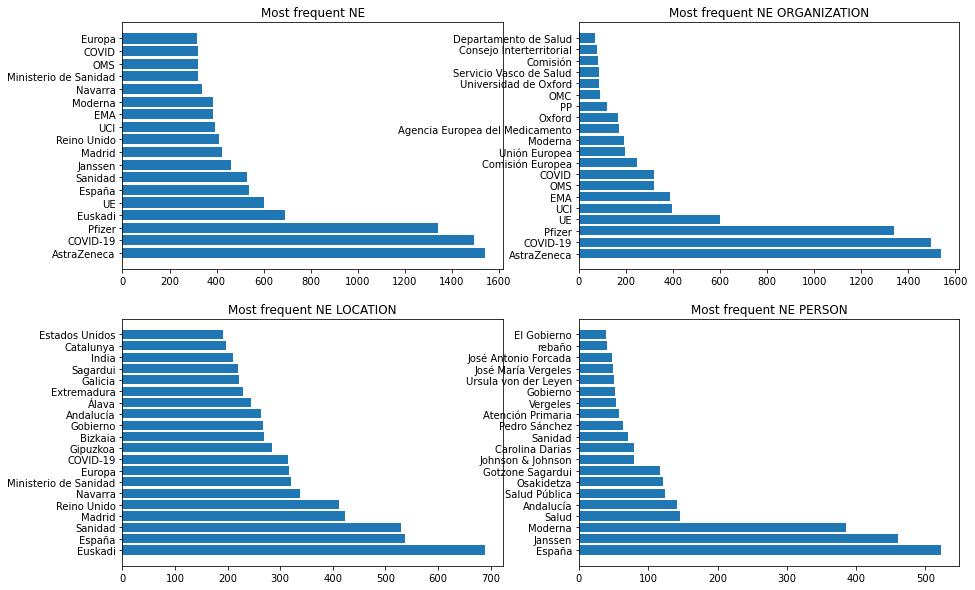

In [6]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')